In [141]:
print("Đề bài của Nguyễn Gia Bách - Lớp 64TTNT1 - Mã số sinh viên - 2251262579:" ,(2251262579 % 7) + 1, " => Đề bài : Sunday")


Đề bài của Nguyễn Gia Bách - Lớp 64TTNT1 - Mã số sinh viên - 2251262579: 7  => Đề bài : Sunday


In [142]:
import numpy as np
import pandas as pd

df_train = pd.read_csv(r"G:\hoc\Time series\BTL\train.csv")
df_test = pd.read_csv(r"G:\hoc\Time series\BTL\test.csv")
df_sample = pd.read_csv(r"G:\hoc\Time series\BTL\sample_submission.csv")
df_train.head()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [143]:
df_train = df_train[df_train["Publication_Day"] == "Sunday"]
df_test = df_test[df_test["Publication_Day"] == "Sunday"]
print(df_train.head())
print(df_test.head())

    id    Podcast_Name Episode_Title  Episode_Length_minutes       Genre  \
6    6  Criminal Minds    Episode 47                   69.83  True Crime   
16  16  Study Sessions    Episode 82                   78.47   Education   
18  18  Digital Digest    Episode 72                    7.34  Technology   
42  42      Innovators    Episode 17                   32.29  Technology   
46  46     Mind & Body     Episode 2                   92.81      Health   

    Host_Popularity_percentage Publication_Day Publication_Time  \
6                        35.82          Sunday            Night   
16                       48.84          Sunday        Afternoon   
18                       20.81          Sunday            Night   
42                       89.36          Sunday          Evening   
46                       28.52          Sunday          Evening   

    Guest_Popularity_percentage  Number_of_Ads Episode_Sentiment  \
6                         39.02            0.0           Neutral   
16  

In [144]:
print(df_train.isnull().sum())

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         13152
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    22423
Number_of_Ads                      0
Episode_Sentiment                  0
Listening_Time_minutes             0
dtype: int64


In [145]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

col = ["Podcast_Name","Episode_Title","Genre","Publication_Day","Publication_Time","Episode_Sentiment"]
for col in col:
    df_train[col] = label_encoder.fit_transform(df_train[col])
    df_test[col] = label_encoder.fit_transform(df_test[col])
    
df_train = df_train.astype(float)
df_train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
6,6.0,6.0,42.0,69.83,9.0,35.82,0.0,3.0,39.02,0.0,1.0,64.75024
16,16.0,40.0,81.0,78.47,2.0,48.84,0.0,0.0,NaN,2.0,1.0,42.89441
18,18.0,10.0,70.0,7.34,8.0,20.81,0.0,3.0,83.06,3.0,2.0,0.75783
42,42.0,23.0,9.0,32.29,8.0,89.36,0.0,1.0,42.61,3.0,1.0,26.57501
46,46.0,31.0,12.0,92.81,3.0,28.52,0.0,1.0,24.65,0.0,2.0,53.58589


1. Kalman Filter cơ bản

Kalman Filter cơ bản để làm min dữ liệu chuỗi thời gian và xử lý giá trị thiếu

In [146]:
print("Giá trị thiếu: ", df_train.isnull().sum())

Giá trị thiếu:  id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         13152
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    22423
Number_of_Ads                      0
Episode_Sentiment                  0
Listening_Time_minutes             0
dtype: int64


In [ ]:
df_train["Episode_Length_minutes"] = df_train["Episode_Length_minutes"].fillna(df_train["Episode_Length_minutes"].mean())
df_train["Guest_Popularity_percentage"] = df_train["Guest_Popularity_percentage"].fillna(df_train["Guest_Popularity_percentage"].mean())

<Axes: >

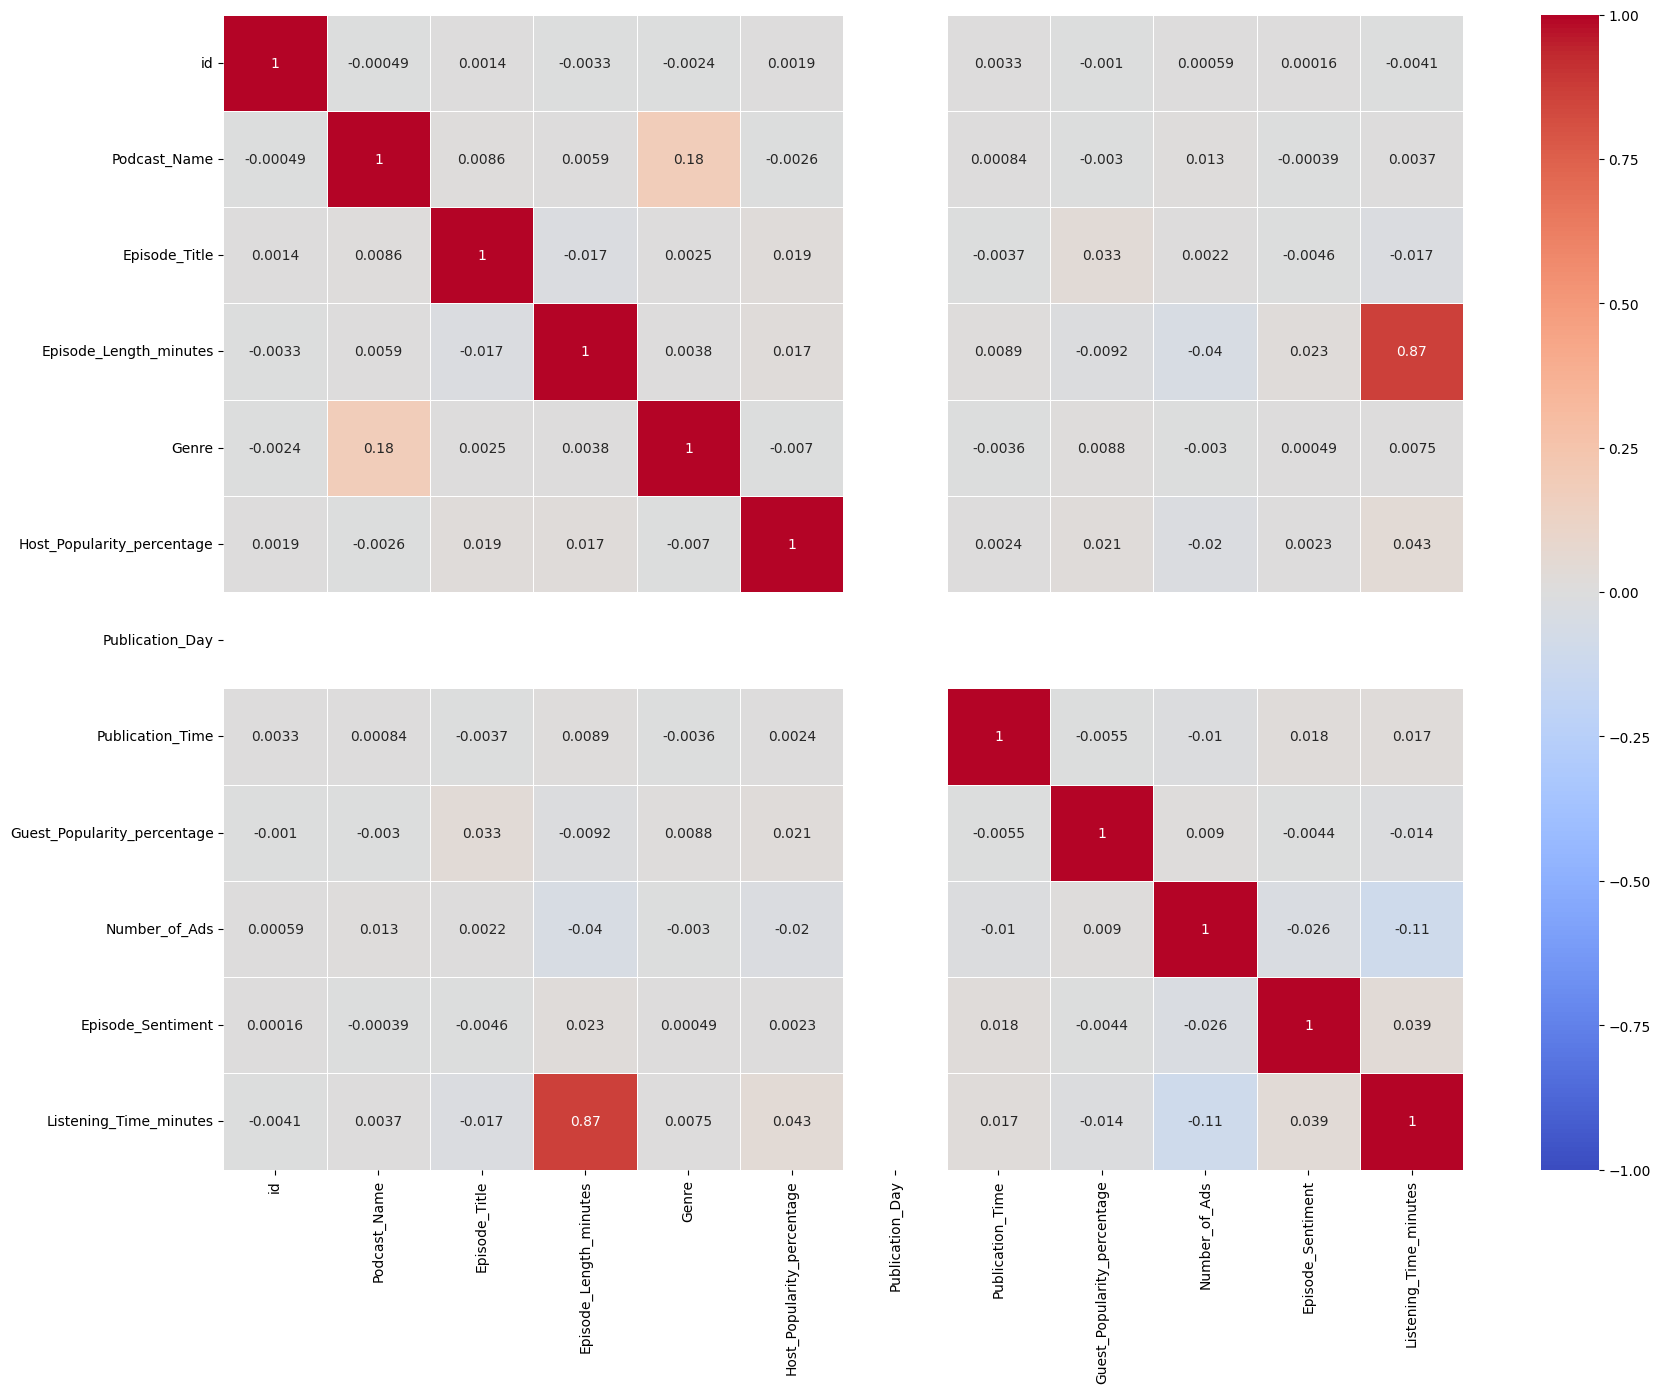

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_train.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

In [149]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

Y = df_train['Listening_Time_minutes']
X = df_train.drop(columns=['Listening_Time_minutes'])
model = SARIMAX(endog=Y, exog=X, order=(1, 0, 1), seasonal_order=(0, 0, 0, 0))
results = model.fit(disp=False)
state_estimates = results.filtered_state
state_estimates

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge

array([[ 12.59790991, -11.24949416,   1.09500992, ...,   6.31590864,
        -12.70151527, -23.55989625],
       [ -1.10617774,   0.98536542,  -0.09420256, ...,  -0.5563319 ,
          1.11391431,   2.07103864]])

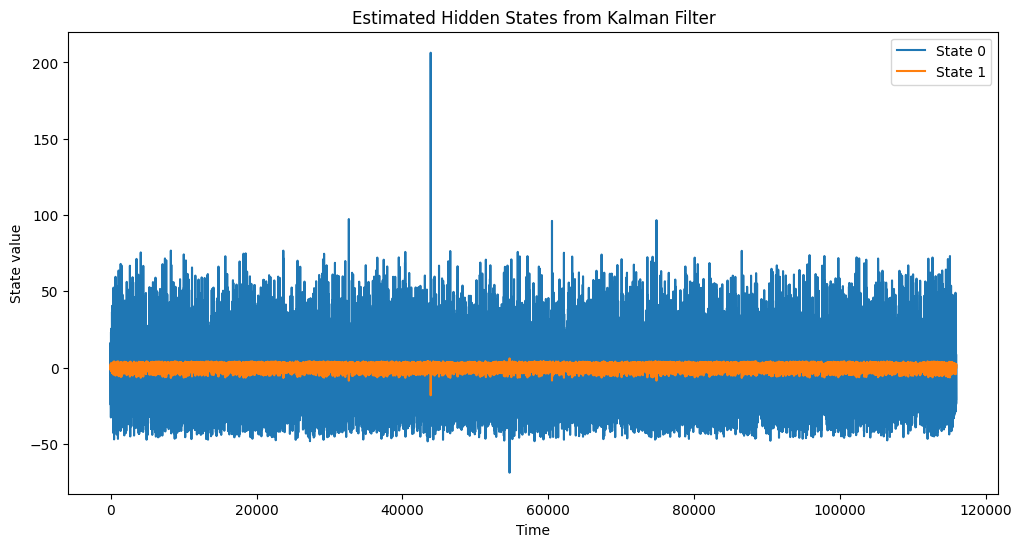

In [150]:
plt.figure(figsize=(12, 6))
for i in range(state_estimates.shape[0]):
    plt.plot(state_estimates[i], label=f'State {i}')
plt.title('Estimated Hidden States from Kalman Filter')
plt.xlabel('Time')
plt.ylabel('State value')
plt.legend()
plt.show()

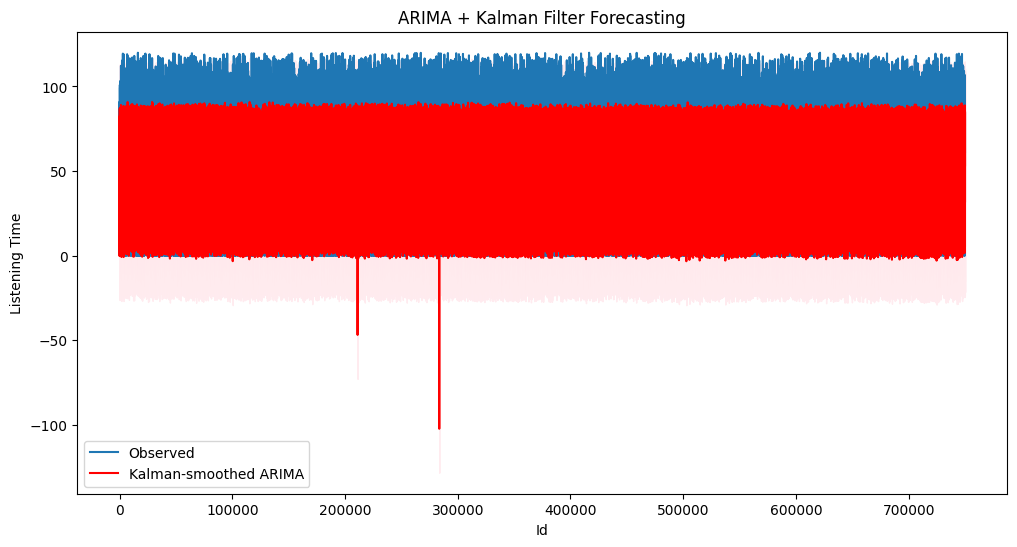

In [169]:
forecast = results.get_prediction()
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()
plt.figure(figsize=(12, 6))
plt.plot(df_train["Listening_Time_minutes"].index, df_train["Listening_Time_minutes"], label='Observed')
plt.plot(predicted_mean.index, predicted_mean, color='red', label='Kalman-smoothed ARIMA')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Id')
plt.ylabel('Listening Time')
plt.legend()
plt.title('ARIMA + Kalman Filter Forecasting')
plt.show()

In [ ]:

# df_sample = df_sample[df_sample["Publication_Day"] == "Sunday"]
forecast = results.predict(start=len(df_test), end=len(df_test) + len(df_test) - 1, exog=df_test)
print(forecast)

251249    42.176405
251258    46.871451
251273    63.549387
251274    75.805934
251276    78.298572
            ...    
502767    71.826322
502769    81.335207
502777    83.999863
502784    28.881673
502786    44.130658
Name: predicted_mean, Length: 38906, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
df_sample = df_sample[df_sample['id'].isin(df_test['id'])]
print(len(df_sample))
print(len(df_test))
print(len(forecast))
mse = mean_squared_error(df_sample["Listening_Time_minutes"], forecast)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

38906
38906
38906
MSE: 531.9867333969868
RMSE: 23.064837597455284


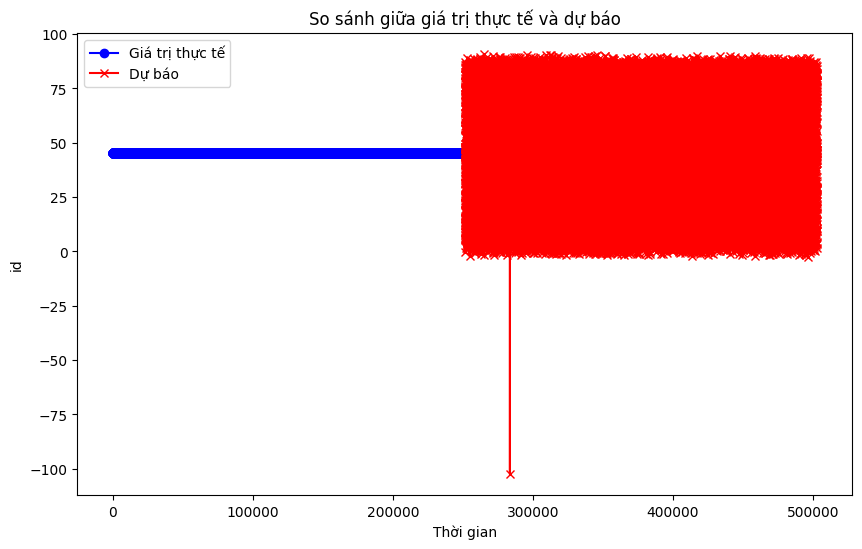

In [168]:
plt.figure(figsize=(10, 6))

plt.plot(df_sample["Listening_Time_minutes"], label='Giá trị thực tế', marker='o', color='blue')

plt.plot(forecast, label='Dự báo', marker='x', color='red')

plt.title("So sánh giữa giá trị thực tế và dự báo")
plt.xlabel("Thời gian")
plt.ylabel("id")
plt.legend()

plt.show()